In [6]:
import numpy as np
import os
import pandas as pd
import arcpy

# Import the required ArcGIS API for Python modules
import arcgis
from arcgis.gis import GIS
from arcgis.features import FeatureLayer
gis = arcgis.GIS()
from arcgis.geoanalytics import manage_data

from IPython.display import display, Markdown

In [7]:
rtpSuffix = 'RTP2023'

dirWork                    = os.getcwd()
dirInput                   = os.path.join(dirWork , r'input'                  )
dirIntermediate            = os.path.join(dirWork , r'intermediate'           )
dirResults                 = os.path.join(dirWork , r'results'                )
dirATOdata                 = os.path.join(dirInput, r'TDM_ATO_Output_RTP_v900') # This folder should contain a copy of all the TDM ATO outputs from the latest official version

print("Working Directory: "      + dirWork          )
print("Input Directory: "        + dirInput         )
print("Intermediate Directory: " + dirIntermediate  )
print("Results Directory: "      + dirResults       )

#name of TAZs
filenameTAZSimpleshp         = os.path.join(dirIntermediate, r'TAZSimple.shp'                )
filenameTAZshpOut            = os.path.join(dirResults     , r'TAZ_ATO_' + rtpSuffix + '.shp') # This file is a copy of the taz shapefile with all the TAZs and only the TAZID and CO_TAZID fields.

#utah shapefile
filenameUtahshp              = os.path.join(dirInput       , r'Utah\Utah.shp')
filenameUtahSimpleshp        = os.path.join(dirIntermediate, 'UtahSimple.shp')

def deleteIfExists(obj):
    if arcpy.Exists(obj): arcpy.Delete_management(obj)

yearForHHJobFilter = 2050

# This should return filename for TDM output that is copied into the input data
def getCSVFilename(year):
    return os.path.join(dirATOdata, 'Access_to_Opportunity_' + str(year) + '.csv')

Working Directory: e:\GitHub\ATO-Web-App\_dataprep
Input Directory: e:\GitHub\ATO-Web-App\_dataprep\input
Intermediate Directory: e:\GitHub\ATO-Web-App\_dataprep\intermediate
Results Directory: e:\GitHub\ATO-Web-App\_dataprep\results


In [13]:
# GET AGOL TAZ LAYER

# Correct REST endpoint URL for the feature layer
feature_layer_url = "https://services1.arcgis.com/taguadKoI1XFwivx/arcgis/rest/services/WFv9_TAZ/FeatureServer/0"

# Access the feature layer
feature_layer = FeatureLayer(feature_layer_url)

# Optionally, print some basic information about the layer
print(feature_layer)

<FeatureLayer url:"https://services1.arcgis.com/taguadKoI1XFwivx/arcgis/rest/services/WFv9_TAZ/FeatureServer/0">


In [20]:
# Replace 'OpenDataKey' with the actual item ID
item_id = "2fec557533dd4d9b9ccbd6f4c81ec870"

print("Downloading...")

# Get the item
item = gis.content.get(item_id)

# Access the first layer of the item
flayer = item.layers[0]

# Convert the feature layer to a Spatial DataFrame
sdf = pd.DataFrame.spatial.from_layer(flayer)

# Display the first few rows of the DataFrame
display(sdf)

Downloading...


,ACRES,ADJ_XY,CBD,CITY_FIPS,CITY_NAME,CITY_UGRC,CO_FIPS,CO_IDX,CO_NAME,CO_TAZID,...,SORT,SUBAREAID,Shape__Area,Shape__Length,TAZID,TAZID_V832,TERMTIME,WALK100,X,Y
0,53.885304,0,0,67000,Salt Lake City,SLC,35,324,SALT LAKE,350324,...,801,1,3.804613e+05,3019.727799,1229,1124,0,0,424640.657110,4.510008e+06
1,602.262229,0,0,7690,Bountiful,BTF,11,248,DAVIS,110248,...,401,1,4.272924e+06,9532.134381,829,613,0,0,428293.205659,4.527861e+06
2,53.680783,0,0,67000,Salt Lake City,SLC,35,325,SALT LAKE,350325,...,802,1,3.790177e+05,3018.051462,1230,1125,0,0,424882.550810,4.510006e+06
3,107.681660,0,0,67000,Salt Lake City,SLC,35,326,SALT LAKE,350326,...,803,1,7.602964e+05,3658.859273,1231,1126,0,0,425245.216636,4.510002e+06
4,107.325984,0,0,67000,Salt Lake City,SLC,35,327,SALT LAKE,350327,...,804,1,7.577864e+05,3655.720078,1232,1127,0,0,425728.287851,4.509998e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3541,222.080694,0,0,72280,Springville,SPV,49,867,UTAH,490867,...,2832,1,1.541132e+06,5131.057808,3083,2518,0,0,446602.419710,4.444526e+06
3542,259.885069,0,0,0,Spanish Fork,na,49,926,UTAH,490926,...,2833,1,1.802999e+06,6088.973755,3142,2521,0,0,445403.446563,4.443542e+06
3543,71.913180,0,0,72280,Springville,SPV,49,848,UTAH,490848,...,2834,1,4.991795e+05,3053.510595,3064,2525,0,0,447749.409836,4.445548e+06
3544,98.791359,0,0,72280,Springville,SPV,49,849,UTAH,490849,...,2835,1,6.857436e+05,3314.666935,3065,2526,0,0,448305.522557,4.445492e+06


In [24]:
import os

def add_suffix_before_extension(filename, suffix):
    """
    Adds a suffix before the file extension.

    :param filename: The original filename
    :param suffix: The suffix to add
    :return: The new filename with the suffix
    """
    file_root, file_ext = os.path.splitext(filename)
    return f"{file_root}{suffix}{file_ext}"

# Example usage
original_filename = "example.txt"
new_filename = add_suffix_before_extension(original_filename, '_Pnt')
print(new_filename)  # Output will be 'example_Pnt.txt'

example_Pnt.txt


In [31]:
# SIMPLIFY TAZ POLYGONS

skip = False

if not skip:
        
    # Path to save the local shapefile and temporary geodatabase
    process_gdb_path = os.path.join(dirIntermediate , r'process.gdb')
    output_fc_path   = os.path.join(process_gdb_path, r'TAZ'        )

    # Create a file geodatabase to store temporary data
    if not arcpy.Exists(process_gdb_path):
        arcpy.CreateFileGDB_management(*os.path.split(process_gdb_path))

    # Export SDF to feature class
    sdf.spatial.to_featureclass(output_fc_path, sanitize_columns=False)

    # Delete if already there... simplify routine creates a related _Pnt shapefile
    deleteIfExists (filenameTAZSimpleshp)
    deleteIfExists (add_suffix_before_extension(filenameTAZSimpleshp,'_Pnt'))
    
    # Simplify the feature class
    arcpy.cartography.SimplifyPolygon(output_fc_path, filenameTAZSimpleshp, "POINT_REMOVE", 100)
    arcpy.DeleteField_management(filenameTAZSimpleshp, ["InPoly_FID", "SimPgnFlag", "MaxSimpTol", "MinSimpTol"])

    # (Optional) Convert the simplified feature class back to a DataFrame
    # sdf_simplified = pd.DataFrame.spatial.from_featureclass(simplified_fc_path)

In [4]:
#HAD TO MANUALLY OPEN SIMPLIFIED UTAH AND ADD STATE CORNERS

#deleteIfExists(filenameUtahSimpleshp)
#arcpy.cartography.SimplifyPolygon(filenameUtahshp, filenameUtahSimpleshp, "WEIGHTED_AREA", 10000)
#arcpy.DeleteField_management(filenameUtahSimpleshp, ["InPoly_FID","SimPgnFlag","MaxSimpTol","MinSimpTol"])

,TAZID,CO_TAZID,SHAPE
0,1229,350324,"{""rings"": [[[-12455659.9644, 4974305.653399996..."
1,829,110248,"{""rings"": [[[-12452338.7416, 4998723.220700003..."
2,1230,350325,"{""rings"": [[[-12455340.841699999, 4973115.3719..."
3,1231,350326,"{""rings"": [[[-12454702.6447, 4973115.215599999..."
4,1232,350327,"{""rings"": [[[-12454067.662, 4974307.454800002]..."
...,...,...,...
3541,3083,490867,"{""rings"": [[[-12426361.3999, 4888336.383699998..."
3542,3142,490926,"{""rings"": [[[-12427274.9037, 4885952.222000003..."
3543,3064,490848,"{""rings"": [[[-12424511.3814, 4888398.136500001..."
3544,3065,490849,"{""rings"": [[[-12424442.9205, 4889379.844300002..."


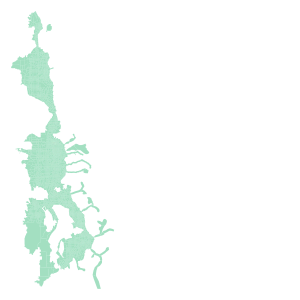

In [37]:
# prep TAZs to be used
sdfTAZInput = pd.DataFrame.spatial.from_featureclass(filenameTAZSimpleshp)

sdfFilteredTAZ = sdfTAZInput[sdfTAZInput['DEVACRES']>0]

# TAZ EXCEPTIONS
#tazInclude = [1, 46, 58, 99, 102, 107, 142, 2191, 2198, 3502, 3504, 3513, 3514, 2267, 2268, 2415, 2416, 2413, 2439, 2441, 2265, 2266, 2413, 2262, 2263, 2259, 2235, 2238, 2225, 1013, 1014, 1208, 1068, 1196, 1294, 1655, 1953, 2060, 2160, 2588, 2912, 297, 3434, 3515, 3253, 3494, 2294]
#tazExclude = [146, 147, 148, 149, 151, 154, 577, 903, 2206, 2207, 3523, 3538, 3545, 3546, 3542, 3529]

#dfYearForHHJobFilter = pd.read_csv(getCSVFilename(yearForHHJobFilter))
#dfTazFiltered = dfYearForHHJobFilter[((dfYearForHHJobFilter['HH'] > 0) | (dfYearForHHJobFilter['Job'] > 0)) & ~dfYearForHHJobFilter['TAZID'].isin(tazExclude) | dfYearForHHJobFilter['TAZID'].isin(tazInclude)]
#dfTazFiltered = dfTazFiltered[['CO_TAZID']]

#display(dfYearForHHJobFilter.shape)
#display(dfTazFiltered.shape)

#sdfFilteredTAZ = pd.DataFrame.merge(sdfTAZInput, dfTazFiltered, on='CO_TAZID')
sdfFilteredTAZ = sdfFilteredTAZ[['TAZID','CO_TAZID','SHAPE']]
display(sdfFilteredTAZ)
display(sdfFilteredTAZ.spatial)

In [36]:
# export to shp

sdfFilteredTAZ.spatial.to_featureclass(filenameTAZshpOut, sanitize_columns=False)
print ('exported ' + filenameTAZshpOut)

exported e:\GitHub\ATO-Web-App\_dataprep\results\TAZ_ATO_RTP2023.shp
